<a href="https://colab.research.google.com/github/jtb1223/109-project-dataset/blob/main/Python_109_dataset_project_Jonathan_Brunner_and_Sohail_Nawaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## importing libraries and the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/jtb1223/109-project-dataset/main/epic%20games%20store-video%20games.csv")
df.head()

,game_link,name,price of game,developer of game,genres of games,features of game,publisher of game,date release,recommended_os,cpu,memory,gpu_x,storage,Critics Recommend,OpenCritic Rating,platform,Top Critic Average
0,"HITMAN - Game of the Year Edition₹3,249",HITMAN - Game of the Year Edition,"₹3,249",IO Interactive A/S,ActionAction-AdventureShooterStealth,Single Player,IO Interactive A/S,09/03/20,OS 64-bit Windows 7 / 64-bit Windows 8 (8.1) o...,"Intel CPU Core i7 3770 3,4 GHz / AMD CPU AMD F...",8,Nvidia GPU GeForce GTX 770 / AMD GPU Radeon R9...,50,92%,Mighty,Windows,84.0
1,"The Medium₹2,949",The Medium,"₹2,949",Bloober Team,HorrorAdventure,Single Player,Bloober Team S.A.,01/28/21,Windows 10 (64bit version only),Intel® Core™ i5-9600 / AMD Ryzen™ 7 3700X,16,@1080p NVIDIA GeForce® GTX 1060 6GB / AMD Rade...,30,63%,Strong,PlatformWindowsWindows,75.0
2,Into the Breach₹446,Into The Breach,₹446,Subset Games,Turn-BasedRogue-LiteStrategy,Single Player,Subset Games,02/27/18,Windows 7+,1.7 GHz,1 GB,NaN,250 MB,90%,Mighty,PlatformWindowsWindowsMac OSMac OS,88.0
3,The Lion's Song₹189,The Lion's Song,₹189,Mi'pu'mi Games,NarrationAdventure,Single Player,Mi'pu'mi Games,05/13/21,Windows 7 / 8 / 10,2 GHZ,1 GB RAM,DirectX 10 compatible,500 MB available space,80%,Strong,PlatformWindowsWindowsMac OSMac OS,81.0
4,Costume Quest₹297,Costume Quest,₹297,Double Fine Productions,RPGAdventure,Single Player,Double Fine Productions,10/19/10,Windows 7 or higher,2.2 GHz dual core CPU,1 GB RAM,NaN,"256 MB GeForce 220, Radeon 4550, Intel HD 3000...",NaN,NaN,PlatformWindowsWindows,NaN


# **Introduction**


This dataset is from the epic games store. It has a list of 900+ games with their price, genre, developer, etc... With this information we are going to show which developers made the most games and which made the most money from those games.

# **Hypothesis**

With the given dataset, we formulated two hypothesis. The first hypothesis is that multiplayer games sell more copies. The second is that the name of the game doesnt affect sales at all.

Each feature of the data given shows all the information we need to get an answer to our hypothesis. We can use the price, genre, developer, feature of the games, recomended os, memory, storage, and platform as a base for our hypothesis. We could also take into account the critic ratings, but typically they are bad opinions or they could have been paid to write good reviews. 

One problem with the dataset we are using is that some of the games do not have any value in the gpu feature. If this was a typo or something went wrong when parsing the data we could fix this, but since there is just a lack of data we cant change anything.

Since most of our data is catagorical, the only feature that we can get the range of reliably is the price.

##Todo list Delete once done##

https://www.kaggle.com/datasets/ramjasmaurya/epic-games-store

https://github.com/MatthewFried/Udemy link to his github with the data examples


In [ ]:
# To display the bottom 5 rows
df.tail() 

,game_link,name,price of game,developer of game,genres of games,features of game,publisher of game,date release,recommended_os,cpu,memory,gpu_x,storage,Critics Recommend,OpenCritic Rating,platform,Top Critic Average
894,"Trackmania Turbo₹1,999",Trackmania Turbo,"₹1,999",DeveloperUbisoft Nadeo,Racing,Multiplayer,PublisherUbisoft,Release Date03/24/16,Windows 7 SP1 or Windows 8.1 or Windows 10,NaN,2 GB RAM,NaN,5 GB available space,67%,Strong,PlatformWindowsWindows,78.0
895,"CoromonAvailable Q1, 2022₹469",Coromon,NaN,DeveloperTRAGsoft,RPGAdventureStrategy,Single PlayerCompetitiveMultiplayer,PublisherFreedom Games,"AvailableQ1, 2022",Windows 7,NaN,1 GB,NaN,NaN,69%,Strong,PlatformWindowsWindows,75.0
896,Kingdom New Lands₹446,Kingdom New Lands,₹446,Developernoio,SimulationSurvivalStrategy,Controller SupportSingle Player,PublisherRaw Fury,Release Date10/21/15,Windows XP,NaN,1 GB RAM,Version 9.0c,NaN,50%,Fair,PlatformWindowsWindowsMac OSMac OSMac OSMac OS,73.0
897,NORCO₹349,NORCO,₹349,DeveloperGeography of Robots,NarrationAdventurePuzzle,Single Player,PublisherRaw Fury,Release Date03/24/22,Windows 7,NaN,4GB,Windows 7,3GB,94%,Mighty,PlatformWindowsWindowsMac OSMac OS,91.0
898,Insurmountable-50%₹599₹299.50,Insurmountable,₹299.50,DeveloperByteRockers' Games,StrategyRogue-LiteSurvival,Single Player,PublisherDaedalic Entertainment,Release Date04/14/22,"WINDOWS® 7, 8.1, 10 64-bit",NaN,8 GB RAM,"WINDOWS® 7, 8.1, 10 64-bit",4 GB available space,55%,Strong,Windows,80.0


In [ ]:
# display column names
df.columns

Index(['game_link', 'name', 'price of game', 'developer of game',
       'genres of games', 'features of game', 'publisher of game',
       'date release', 'recommended_os', 'cpu', 'memory', 'gpu_x', 'storage',
       'Critics Recommend', 'OpenCritic Rating', 'platform',
       'Top Critic Average'],
      dtype='object')

In [ ]:
# Size of the dataset:
df.shape


(899, 17)

In [ ]:
# unique value
df.nunique(axis=0)

game_link             899
name                  899
price of game         170
developer of game     686
genres of games       403
features of game       39
publisher of game     414
date release          507
recommended_os        318
cpu                   443
memory                100
gpu_x                 552
storage               365
Critics Recommend      93
OpenCritic Rating       4
platform                4
Top Critic Average     45
dtype: int64

In [ ]:
# Statistical Summary of Numeric Variables:
df.describe()

,Top Critic Average
count,486.000000
mean,75.841564
std,7.815238
min,46.000000
25%,72.000000
50%,76.000000
75%,81.000000
max,96.000000


Text(0.5, 1.0, 'Correlations')

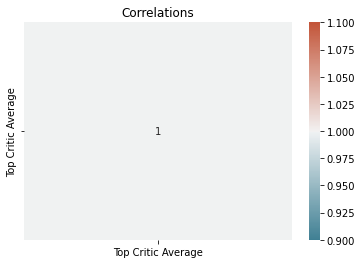

In [ ]:
##correlation matrix
# calculate correlation matrix
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlations')